In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [46]:
df=pd.read_csv("Fraud_check.csv")

In [47]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 4E28-3FB0

 Directory of C:\Users\HP\Desktop\Assingments\assingment no.14(Desision tree)

12/15/2022  12:26 PM    <DIR>          .
12/15/2022  12:26 PM    <DIR>          ..
12/13/2022  10:37 AM    <DIR>          .ipynb_checkpoints
12/13/2022  10:34 AM            17,023 Company_Data.csv
12/14/2022  05:43 PM            18,826 Fraud_check.csv
12/15/2022  12:26 PM         3,650,268 Fraud_checkDecision Tree.ipynb
12/13/2022  10:34 AM             1,377 problem statement(company data).txt
12/14/2022  05:24 PM               470 Problem_statement(Fraudcheck).txt
               5 File(s)      3,687,964 bytes
               3 Dir(s)  140,468,482,048 bytes free


In [48]:
df

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [49]:
df.isna().sum()

Undergrad          0
Marital_Status     0
Taxable_Income     0
City_Population    0
Work_Experience    0
Urban              0
dtype: int64

In [50]:
df[df['Taxable_Income']<= 30000]

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
10,NO,Single,29732,102602,19,YES
12,NO,Divorced,11794,148033,14,YES
16,YES,Divorced,24987,34551,29,NO
19,NO,Single,10987,126953,30,YES
21,YES,Divorced,14310,29106,7,YES
...,...,...,...,...,...,...
544,NO,Single,29916,133877,21,YES
557,YES,Married,12810,157421,10,NO
567,YES,Single,16316,129912,30,NO
575,NO,Divorced,10735,95975,13,YES


In [51]:
#Creating a new column called Fraud_Check 
group_names = ['Risky', 'Good']
df['Fraud_Check']=pd.cut(df['Taxable_Income'], bins = [0,30000,1000000], labels = group_names)

In [52]:
for i in range(0,len(df['Taxable_Income'])):
    if df['Taxable_Income'][i]<=30000:
        df['Fraud_Check'][i] = 'Risky'
    else:
        df['Fraud_Check'][i] = 'Good'

In [53]:
df.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Fraud_Check
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [54]:
df["Taxable_Income"].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable_Income, dtype: float64

In [55]:
df['Fraud_Check'].value_counts()

Good     476
Risky    124
Name: Fraud_Check, dtype: int64

In [56]:
df["Fraud_Check"]=df["Fraud_Check"].replace(['Risky','Good'],[0,1])
df['Urban']=df['Urban'].replace(['YES','NO'],[1,0])
df['Undergrad']=df['Undergrad'].replace(['YES','NO'],[1,0])
df["Marital_Status"]=df["Marital_Status"].replace(['Single','Divorced','Married'],[0,1,2])

In [57]:
df

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Fraud_Check
0,0,0,68833,50047,10,1,1
1,1,1,33700,134075,18,1,1
2,0,2,36925,160205,30,1,1
3,1,0,50190,193264,15,1,1
4,0,2,81002,27533,28,0,1
...,...,...,...,...,...,...,...
595,1,1,76340,39492,7,1,1
596,1,1,69967,55369,2,1,1
597,0,1,47334,154058,0,1,1
598,1,2,98592,180083,17,0,1


In [58]:
df['Fraud_Check'].value_counts()

1    476
0    124
Name: Fraud_Check, dtype: int64

In [59]:
df['Urban'].value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [60]:
df['Marital_Status'].value_counts()

0    217
2    194
1    189
Name: Marital_Status, dtype: int64

# Splitting data in x and y variable

In [61]:
df.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Fraud_Check
0,0,0,68833,50047,10,1,1
1,1,1,33700,134075,18,1,1
2,0,2,36925,160205,30,1,1
3,1,0,50190,193264,15,1,1
4,0,2,81002,27533,28,0,1


In [62]:
df.columns

Index(['Undergrad', 'Marital_Status', 'Taxable_Income', 'City_Population',
       'Work_Experience', 'Urban', 'Fraud_Check'],
      dtype='object')

In [63]:
df_new=df[['Undergrad', 'Marital_Status', 'City_Population',
       'Work_Experience', 'Urban','Fraud_Check']]

In [64]:
df_new.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Fraud_Check
0,0,0,50047,10,1,1
1,1,1,134075,18,1,1
2,0,2,160205,30,1,1
3,1,0,193264,15,1,1
4,0,2,27533,28,0,1


In [65]:
X=df_new.iloc[:,:-1]
Y=df_new.iloc[:,-1]

In [66]:
X.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban
0,0,0,50047,10,1
1,1,1,134075,18,1
2,0,2,160205,30,1
3,1,0,193264,15,1
4,0,2,27533,28,0


In [67]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Fraud_Check, dtype: int64

In [68]:
df_new.columns

Index(['Undergrad', 'Marital_Status', 'City_Population', 'Work_Experience',
       'Urban', 'Fraud_Check'],
      dtype='object')

# Splitting data into train and test data

In [71]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((480, 5), (120, 5), (480,), (120,))

In [72]:
x_train

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban
284,0,1,188383,22,1
423,0,2,80249,19,1
525,1,0,75307,23,0
519,1,0,162102,25,1
12,0,1,148033,14,1
...,...,...,...,...,...
369,0,2,89122,28,0
320,1,0,78897,11,1
527,0,2,180274,27,0
125,1,1,155669,11,0


In [73]:
y_train

284    0
423    1
525    1
519    1
12     0
      ..
369    1
320    1
527    1
125    1
265    0
Name: Fraud_Check, Length: 480, dtype: int64

# Building Decision Tree Classifier using gini Criteria

In [74]:
model= DecisionTreeClassifier(criterion = 'gini',min_samples_split=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=5)

In [75]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    89
0    31
dtype: int64

In [76]:
from sklearn import metrics
metrics.accuracy_score(preds,y_test)

0.6083333333333333

In [77]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.16      0.19      0.18        26
           1       0.76      0.72      0.74        94

    accuracy                           0.61       120
   macro avg       0.46      0.46      0.46       120
weighted avg       0.63      0.61      0.62       120



In [78]:
model.feature_importances_

array([0.02445771, 0.10962448, 0.58955467, 0.22654585, 0.04981729])

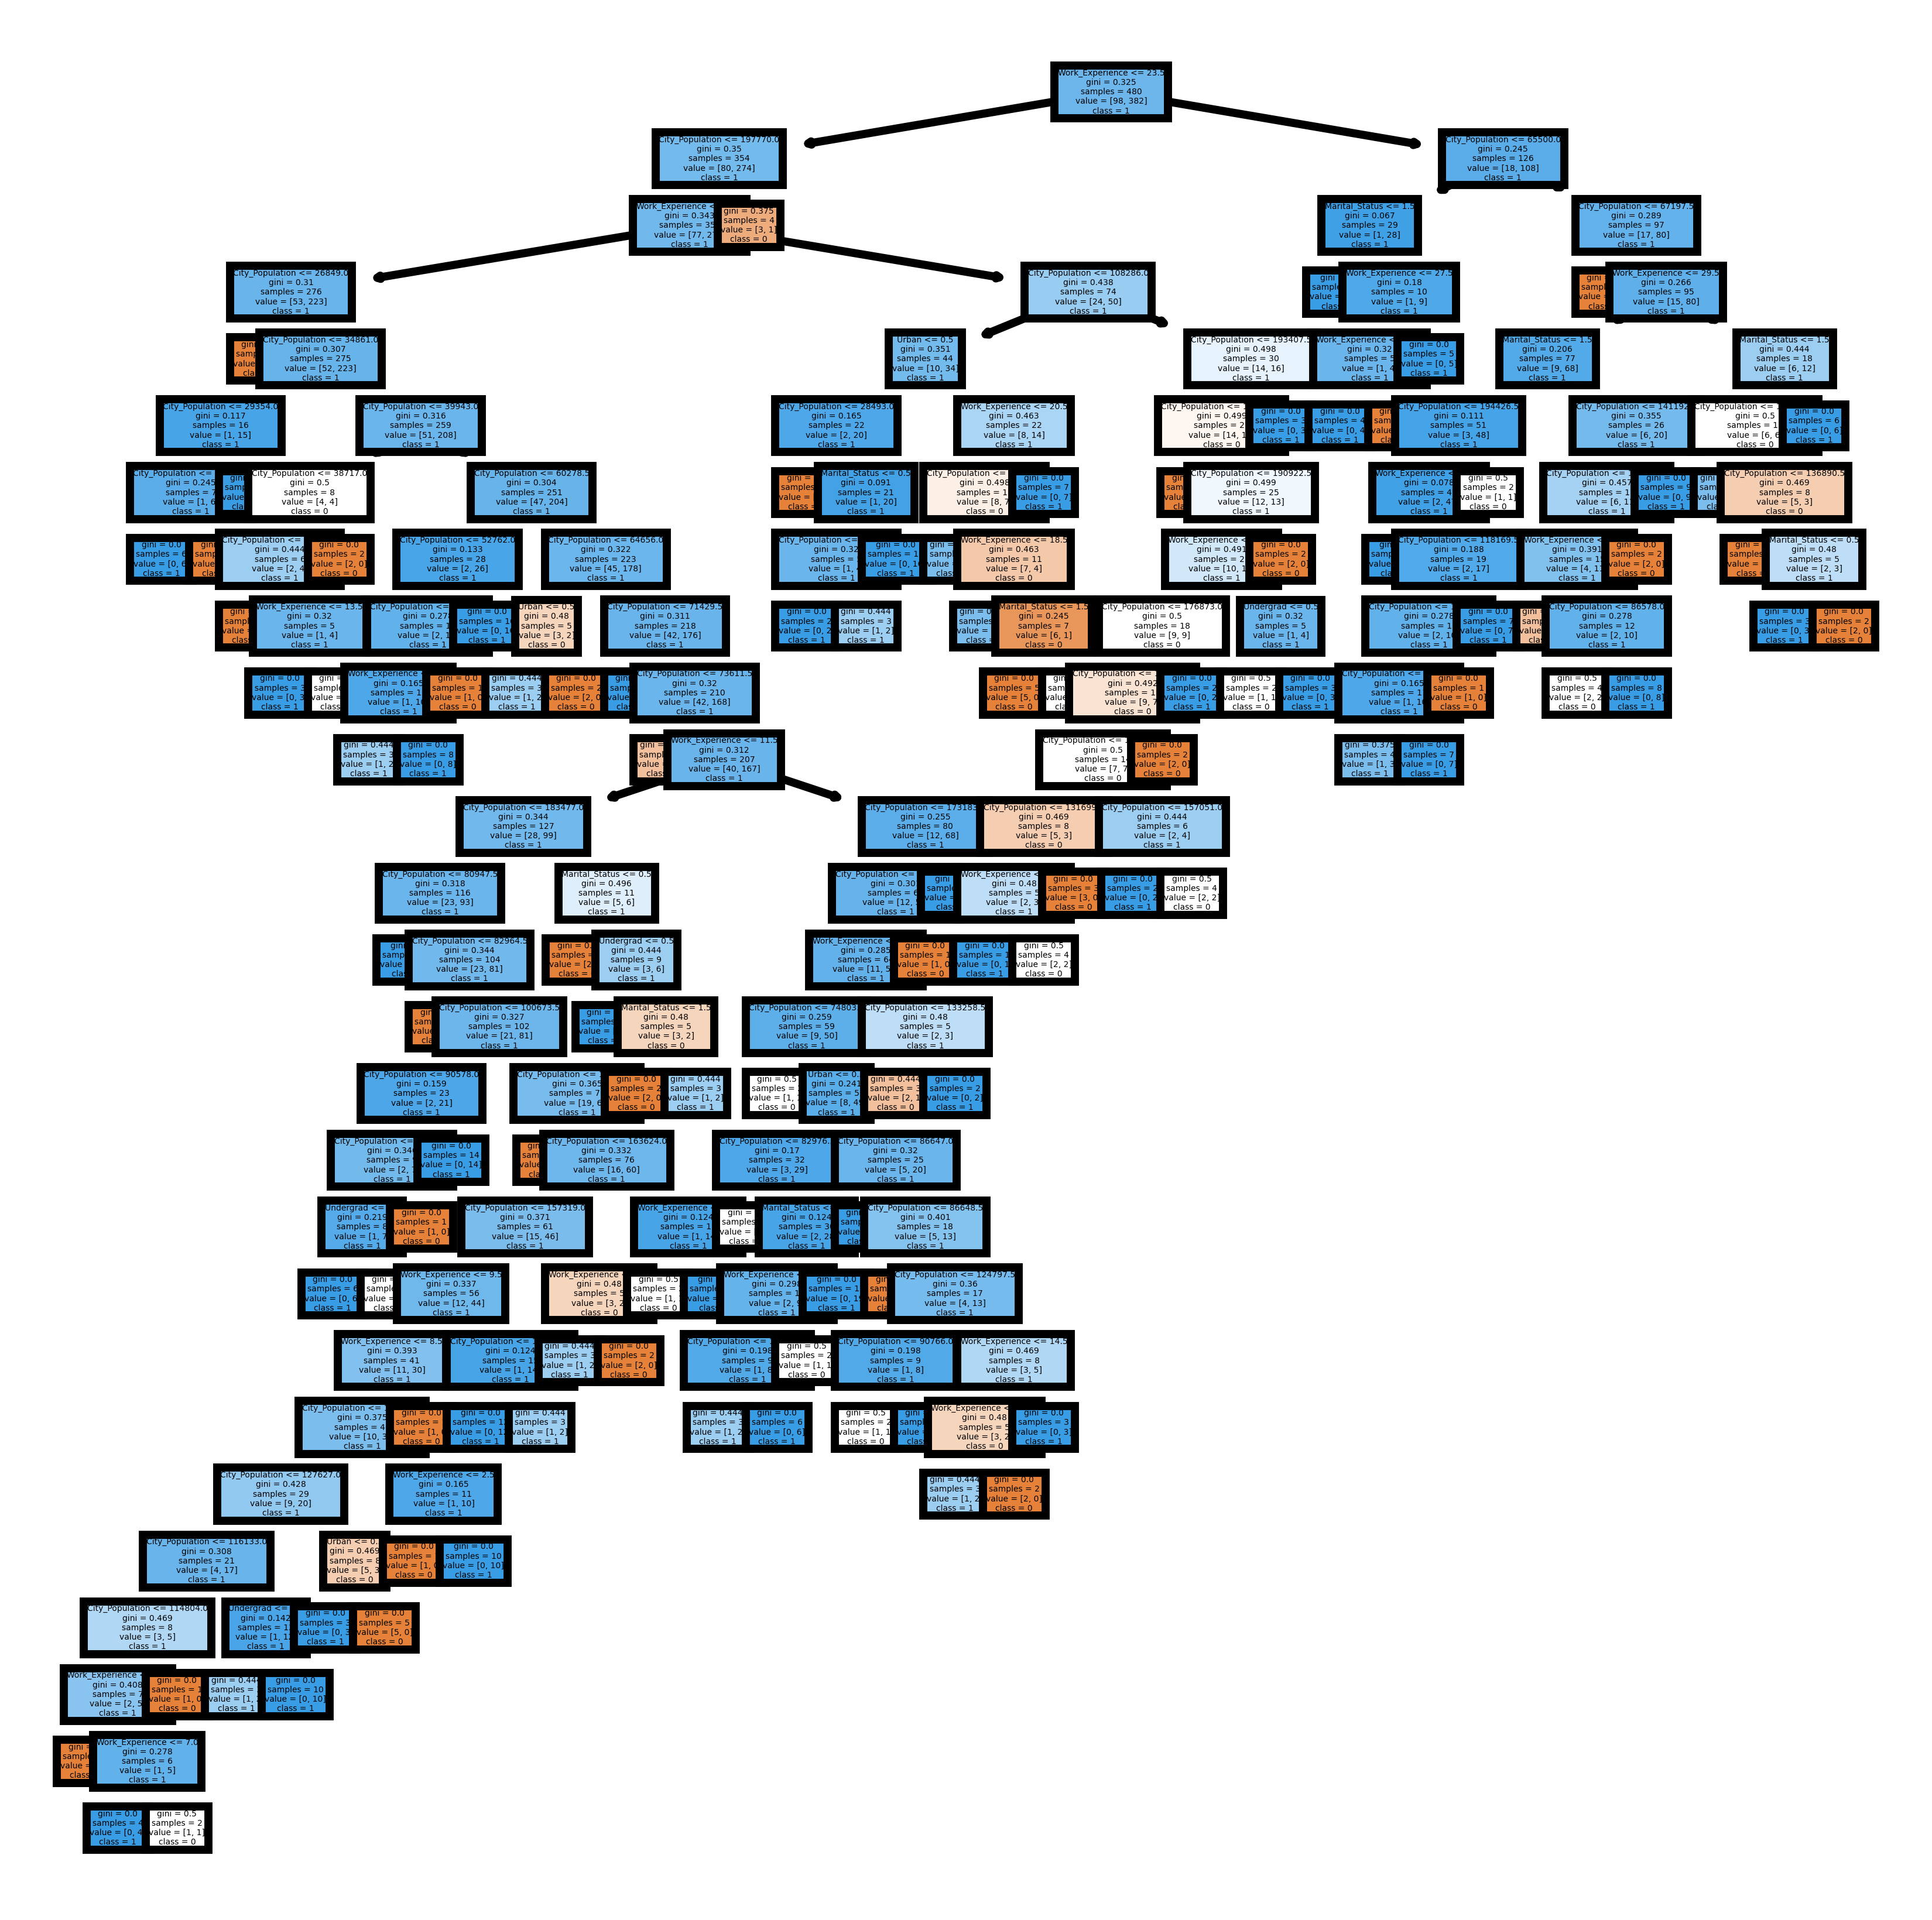

In [37]:
fn=['Undergrad', 'Marital_Status', 'City_Population', 'Work_Experience','Urban']
cn=['0','1']
fig, axes = plt.subplots(figsize = (4,4), dpi=1000)
tree.plot_tree(model,feature_names = fn,class_names=cn,filled = True);
plt.show()

# Building Decision Tree Classifier (CART) using entropyCriteria

In [38]:
new_model = DecisionTreeClassifier(criterion = 'entropy',min_samples_split=5)
new_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [39]:
preds = new_model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

1    94
0    26
dtype: int64

In [40]:
#Prediction and computing the accuracy
preds=new_model.predict(x_test)
metrics.accuracy_score(preds,y_test)

0.6666666666666666

In [44]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.23      0.23      0.23        26
           1       0.79      0.79      0.79        94

    accuracy                           0.67       120
   macro avg       0.51      0.51      0.51       120
weighted avg       0.67      0.67      0.67       120



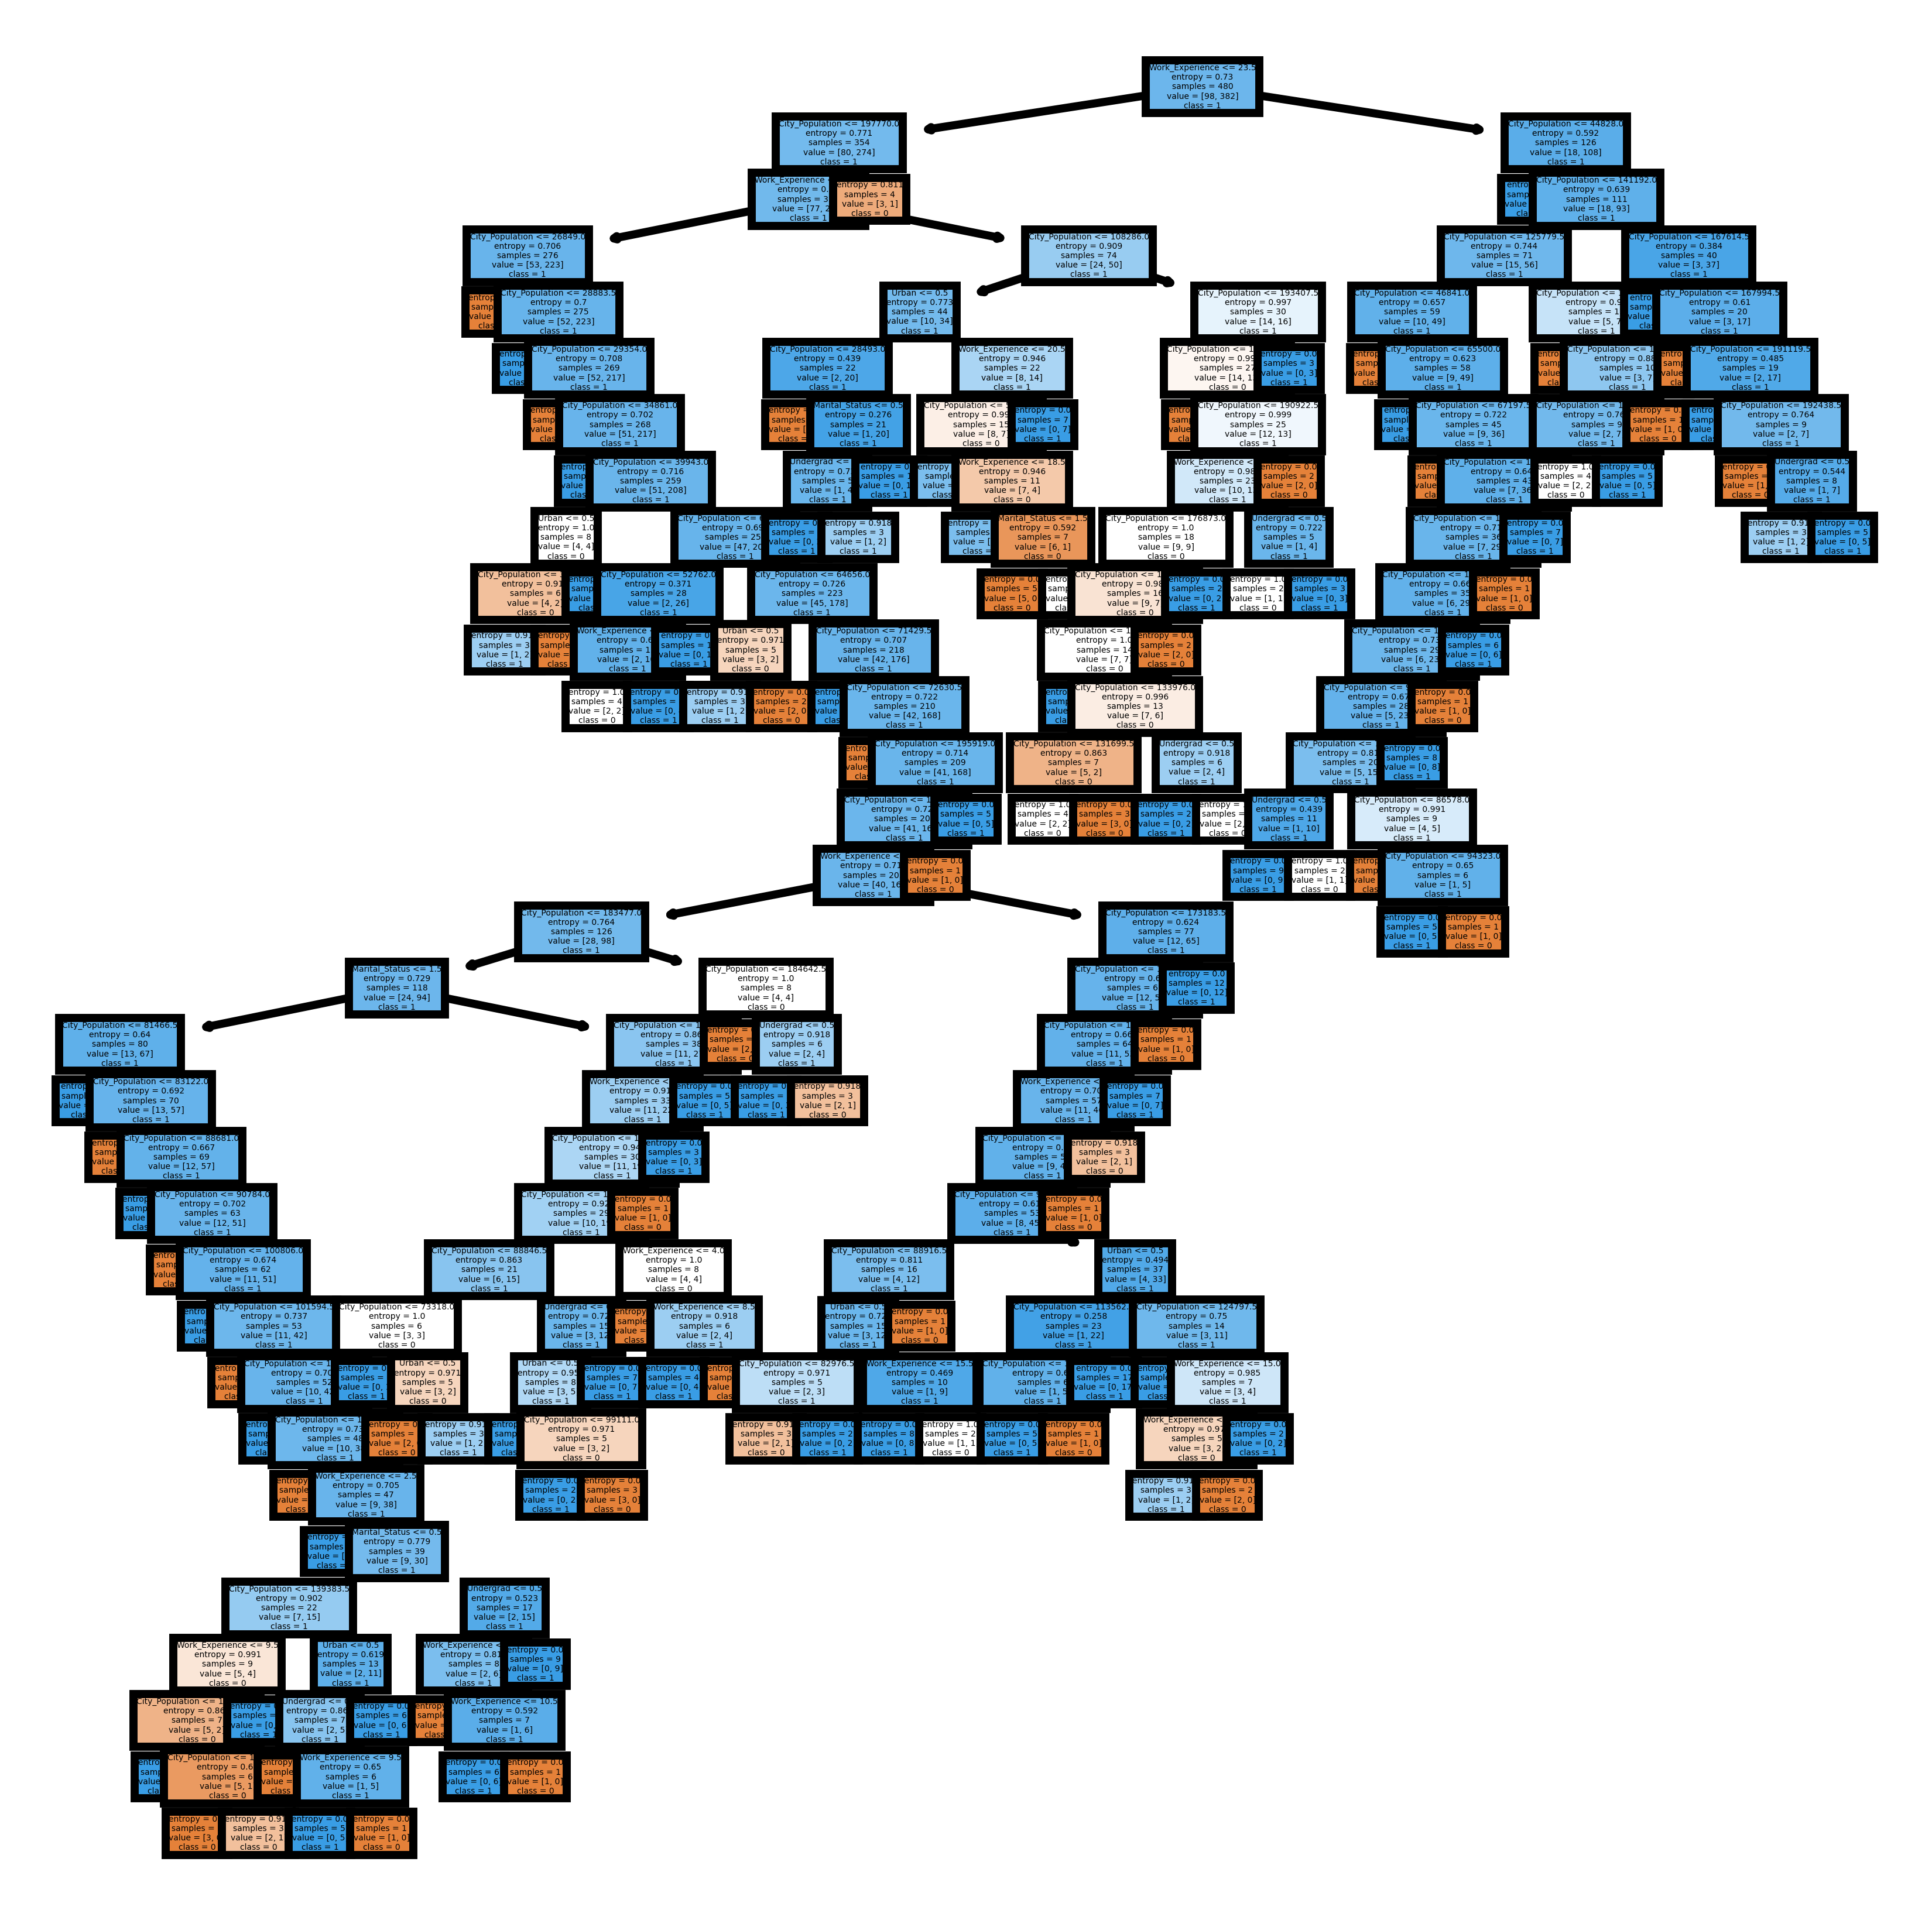

In [43]:
fn=['Undergrad', 'Marital_Status', 'City_Population', 'Work_Experience','Urban']
cn=['0','1']
fig, axes = plt.subplots(figsize = (4,4), dpi=1000)
tree.plot_tree(new_model,feature_names = fn,class_names=cn,filled = True);
plt.show()